## Lab - Random Variable Distributions

In [2]:
#Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
def snake_case(df):
    cols = []
    for c in df.columns:
        cols.append(c.lower())
    df.columns = cols
    cols_ = df.columns.str.replace(' ', '_')
    df.columns = cols_
    return df

customer_df = snake_case(customer_df)
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# get the numerical (continuous) variables
def discr_cont(df):
    cat = df.select_dtypes(include=object)
    continuous = []
    discrete = []
    
    for c in df.select_dtypes(include=np.number):
        if len(df[c].unique()) < 10:
            discrete.append(c)
        else:
            continuous.append(c)
    return cat, continuous, discrete

cat, continuous, discrete = discr_cont(customer_df)

In [9]:
continuous_df = pd.DataFrame(data=customer_df,columns=continuous)

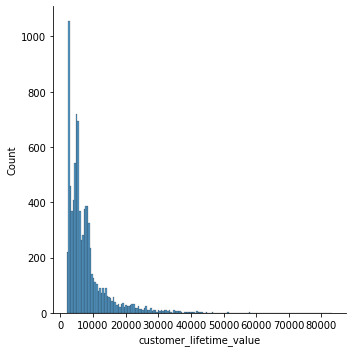

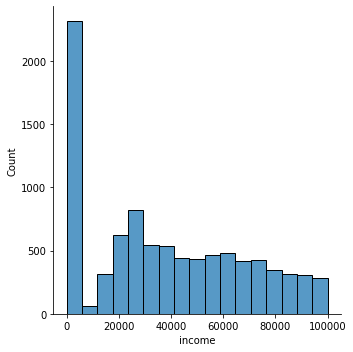

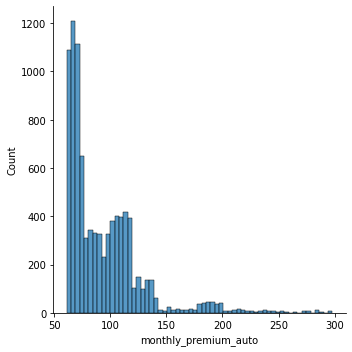

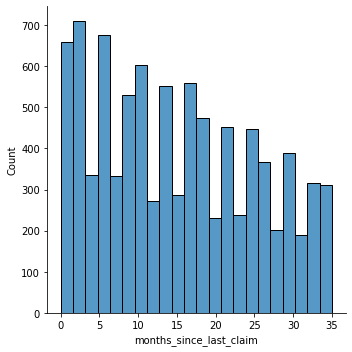

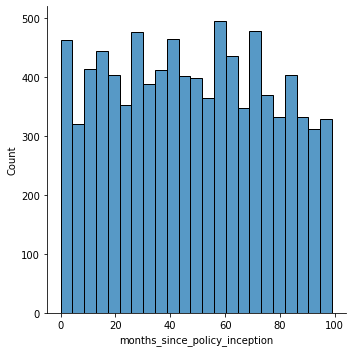

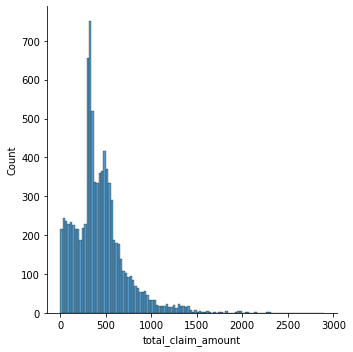

In [10]:
#Displot to check the distributions
# The graphs below show an exponential distribution for, customer lifetimevalue, monthly premium auto and a bit for total claim amount, although thats not a perfect fit
# I don't really see a clear normal distribution
def displot_cont(df):
    for c in df:
        sns.displot(x=c, data=df)
        plt.show()
    return None

displot_cont(continuous_df)

In [13]:
# Apply log transform to see if the graphs change
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

for column in continuous_df:
    continuous_df[column] = continuous_df[column].apply(log_transform)

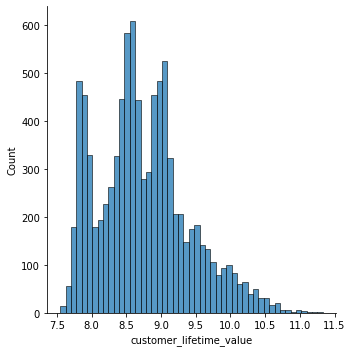

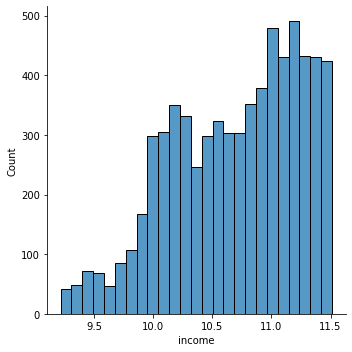

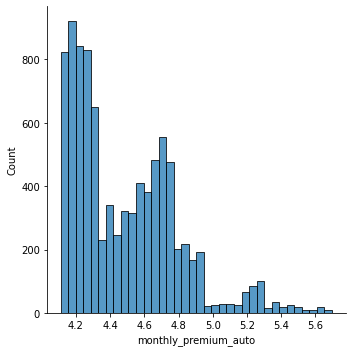

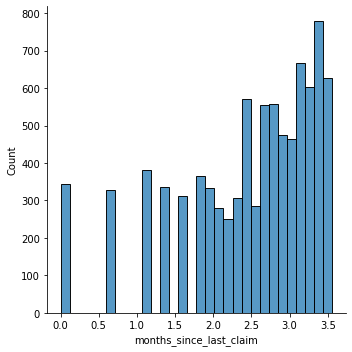

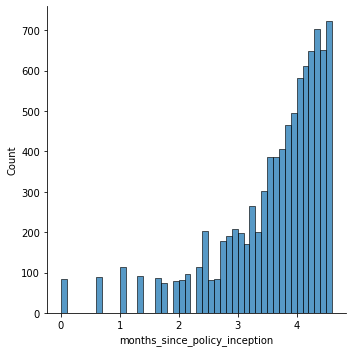

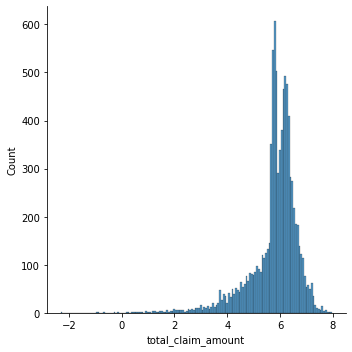

In [14]:
#Applying log transform makes the graphs look differently
# Now customer lifetime value, and total claim amount look more normally distributed
# the rest of the columns now have the shape of an exponential distribution
def displot_cont(df):
    for c in df:
        sns.displot(x=c, data=df)
        plt.show()
    return None

displot_cont(continuous_df)

In [16]:
# BONUS
# Formulate a hypothesis about ‘car insurance clients in the United States’.
# H0: car insurance clients' vehicle class is NOT dependent on the clients' education
# H1: car insurance clients' vehicle class is dependent on the clients' education

cross_education_vehicle = pd.crosstab(customer_df['vehicle_size'],customer_df['education'],margins=False)
cross_education_vehicle

education,Bachelor,College,Doctor,High School or Below,Master
vehicle_size,,,,,
Large,255,274,33,295,89
Medsize,1968,1902,259,1801,494
Small,525,505,50,526,158


In [18]:
import scipy.stats as st
st.chi2_contingency(cross_education_vehicle)

(18.488369147474945,
 0.017848771815727797,
 8,
 array([[ 284.60783884,  277.66871031,   35.42062623,  271.55813444,
           76.74469017],
        [1932.68578936, 1885.56426538,  240.53076418, 1844.06919203,
          521.14998905],
        [ 530.7063718 ,  517.7670243 ,   66.04860959,  506.37267353,
          143.10532078]]))

In [ ]:
# There seems to be evidence that the clients' vehicle size is dependent on the clients' education!

In [21]:
# H0: car insurance clients' lifetime value is NOT dependent on the clients' employmentstatus
# H1: car insurance clients' lifetime value is dependent on the clients' employmentstatus

cross_lifetime_income = pd.crosstab(customer_df['customer_lifetime_value'],customer_df['employmentstatus'],margins=False)
cross_lifetime_income


employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
customer_lifetime_value,,,,,
1898.007675,0,0,0,0,1
1898.683686,0,0,0,0,1
1904.000852,0,0,0,0,1
1918.119700,0,0,0,0,1
1940.981221,0,0,0,0,1
...,...,...,...,...,...
66025.754070,0,1,0,0,0
67907.270500,0,1,0,0,0
73225.956520,0,1,0,0,0


In [22]:
st.chi2_contingency(cross_lifetime_income)

(36536.00000000001,
 1.090856748447986e-61,
 32160,
 array([[0.04433983, 0.62382308, 0.04729582, 0.03087366, 0.25366762],
        [0.04433983, 0.62382308, 0.04729582, 0.03087366, 0.25366762],
        [0.04433983, 0.62382308, 0.04729582, 0.03087366, 0.25366762],
        ...,
        [0.04433983, 0.62382308, 0.04729582, 0.03087366, 0.25366762],
        [0.04433983, 0.62382308, 0.04729582, 0.03087366, 0.25366762],
        [0.04433983, 0.62382308, 0.04729582, 0.03087366, 0.25366762]]))

In [ ]:
# There seems to be evidence that the clients' lifetime value is dependent on the clients' employmentstatus